In [64]:
import torch
from torchviz import make_dot
from models import Generator
import matplotlib.pyplot as plt

class Option(object):
  pass


opt = Option()
opt.input_nc = 3  # input number of channels.
opt.output_nc = 3  # output number of channels.

netG_A2B = Generator(opt.input_nc, opt.output_nc)
real_A = torch.zeros(1, 3, 256, 256)

fake_B = netG_A2B(real_A)
dot = make_dot(fake_B, params=dict(netG_A2B.named_parameters()))

In [10]:
# import graphviz
# g = graphviz.Graph()
dot.render('output/netG_A2B_model.gv')

'output/netG_A2B_model.gv.pdf'

In [15]:
# Test json usage

import json

with open('example.json', 'w') as fout:
    json.dump({
        'hello': 'world'
    }, fout)

with open('example.json', 'r') as fin:
    print(json.load(fin))

{'hello': 'world'}


In [164]:
# test args to dict
import argparse

parser = argparse.ArgumentParser()
parser.add_argument('--run_id', type=str, default='default', help='If existing run_id is found, will resume from that')
parser.add_argument('--epoch', type=int, default=0, help='starting epoch')
parser.add_argument('--n_epochs', type=int, default=200, help='number of epochs of training')
parser.add_argument('--batchSize', type=int, default=1, help='size of the batches')
parser.add_argument('--dataroot', type=str, default='datasets/horse2zebra/', help='root directory of the dataset')
parser.add_argument('--lr', type=float, default=0.0002, help='initial learning rate')
parser.add_argument('--decay_epoch', type=int, default=100, help='epoch to start linearly decaying the learning rate to 0')
parser.add_argument('--size', type=int, default=256, help='size of the data crop (squared assumed)')
parser.add_argument('--input_nc', type=int, default=3, help='number of channels of input data')
parser.add_argument('--output_nc', type=int, default=3, help='number of channels of output data')
parser.add_argument('--cuda', action='store_true', help='use GPU computation')
parser.add_argument('--n_cpu', type=int, default=8, help='number of cpu threads to use during batch generation')


# opt = parser.parse_args()

_StoreAction(option_strings=['--n_cpu'], dest='n_cpu', nargs=None, const=None, default=8, type=<class 'int'>, choices=None, help='number of cpu threads to use during batch generation', metavar=None)

In [165]:
opt, _ = parser.parse_known_args()

{
    **vars(opt),
    'epoch': 20,
}

{'run_id': 'default',
 'epoch': 20,
 'n_epochs': 200,
 'batchSize': 1,
 'dataroot': 'datasets/horse2zebra/',
 'lr': 0.0002,
 'decay_epoch': 100,
 'size': 256,
 'input_nc': 3,
 'output_nc': 3,
 'cuda': False,
 'n_cpu': 8}

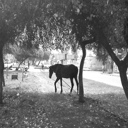

In [56]:
import glob
from PIL import Image
import torchvision.transforms as transforms

opt = Option()
opt.size = 128
# opt.size = 28

transforms_ = transforms.Compose([
    transforms.Resize(int(opt.size * 1.12), Image.BICUBIC),
    transforms.RandomCrop(opt.size),
    transforms.RandomHorizontalFlip(),
#     transforms.ToTensor(),
#     transforms.Normalize([0.5], [0.5])
])


img_paths = glob.glob('datasets/horse2zebra/train/A/*')
img = transforms_(Image.open(img_paths[0]))
img

In [79]:
# Test transform 1d vs. 3d

import glob
from PIL import Image
import torchvision.transforms as transforms

opt = Option()
opt.size = 128
# opt.size = 28

transforms_no_norm = transforms.Compose([
    transforms.Resize(int(opt.size * 1.12), Image.BICUBIC),
#     transforms.RandomCrop(opt.size),
#     transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
])

transforms_1d = transforms.Compose([
    transforms.Resize(int(opt.size * 1.12), Image.BICUBIC),
#     transforms.RandomCrop(opt.size),
#     transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

transforms_3d = transforms.Compose([
    transforms.Resize(int(opt.size * 1.12), Image.BICUBIC),
#     transforms.RandomCrop(opt.size),
#     transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.5] * 3, [0.5] * 3)
])


img_paths = glob.glob('datasets/horse2zebra/train/A/*')
img_no_norm = transforms_no_norm(Image.open(img_paths[0]))
img_1d = transforms_1d(Image.open(img_paths[0]))
img_3d = transforms_3d(Image.open(img_paths[0]))

In [80]:
mean = torch.as_tensor([0.5])[:, None, None]
std = torch.as_tensor([0.5])[:, None, None]
img_no_norm.sub_(mean).div_(std)

tensor([[[-0.5059, -0.5294, -0.5922,  ..., -0.2471, -0.3098, -0.3333],
         [-0.5059, -0.5608, -0.6157,  ..., -0.2549, -0.2706, -0.2314],
         [-0.5608, -0.6000, -0.6471,  ..., -0.1765, -0.2471, -0.2471],
         ...,
         [-0.6157, -0.5765, -0.5686,  ..., -0.4902, -0.3882, -0.1765],
         [-0.6863, -0.6314, -0.6078,  ..., -0.3725, -0.3647, -0.1608],
         [-0.6863, -0.6000, -0.5843,  ..., -0.1843, -0.3961, -0.3255]],

        [[-0.5059, -0.5294, -0.5922,  ..., -0.2471, -0.3098, -0.3333],
         [-0.5059, -0.5608, -0.6157,  ..., -0.2549, -0.2706, -0.2314],
         [-0.5608, -0.6000, -0.6471,  ..., -0.1765, -0.2471, -0.2471],
         ...,
         [-0.6157, -0.5765, -0.5686,  ..., -0.4902, -0.3882, -0.1765],
         [-0.6863, -0.6314, -0.6078,  ..., -0.3725, -0.3647, -0.1608],
         [-0.6863, -0.6000, -0.5843,  ..., -0.1843, -0.3961, -0.3255]],

        [[-0.5059, -0.5294, -0.5922,  ..., -0.2471, -0.3098, -0.3333],
         [-0.5059, -0.5608, -0.6157,  ..., -0

tensor([[[-0.5059, -0.5294, -0.5922,  ..., -0.2471, -0.3098, -0.3333],
         [-0.5059, -0.5608, -0.6157,  ..., -0.2549, -0.2706, -0.2314],
         [-0.5608, -0.6000, -0.6471,  ..., -0.1765, -0.2471, -0.2471],
         ...,
         [-0.6157, -0.5765, -0.5686,  ..., -0.4902, -0.3882, -0.1765],
         [-0.6863, -0.6314, -0.6078,  ..., -0.3725, -0.3647, -0.1608],
         [-0.6863, -0.6000, -0.5843,  ..., -0.1843, -0.3961, -0.3255]],

        [[-0.5059, -0.5294, -0.5922,  ..., -0.2471, -0.3098, -0.3333],
         [-0.5059, -0.5608, -0.6157,  ..., -0.2549, -0.2706, -0.2314],
         [-0.5608, -0.6000, -0.6471,  ..., -0.1765, -0.2471, -0.2471],
         ...,
         [-0.6157, -0.5765, -0.5686,  ..., -0.4902, -0.3882, -0.1765],
         [-0.6863, -0.6314, -0.6078,  ..., -0.3725, -0.3647, -0.1608],
         [-0.6863, -0.6000, -0.5843,  ..., -0.1843, -0.3961, -0.3255]],

        [[-0.5059, -0.5294, -0.5922,  ..., -0.2471, -0.3098, -0.3333],
         [-0.5059, -0.5608, -0.6157,  ..., -0

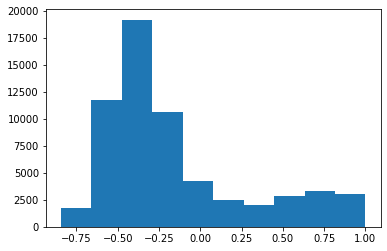

In [81]:
plt.hist(img_1d.flatten())
img_1d

tensor([[[-0.5059, -0.5294, -0.5922,  ..., -0.2471, -0.3098, -0.3333],
         [-0.5059, -0.5608, -0.6157,  ..., -0.2549, -0.2706, -0.2314],
         [-0.5608, -0.6000, -0.6471,  ..., -0.1765, -0.2471, -0.2471],
         ...,
         [-0.6157, -0.5765, -0.5686,  ..., -0.4902, -0.3882, -0.1765],
         [-0.6863, -0.6314, -0.6078,  ..., -0.3725, -0.3647, -0.1608],
         [-0.6863, -0.6000, -0.5843,  ..., -0.1843, -0.3961, -0.3255]],

        [[-0.5059, -0.5294, -0.5922,  ..., -0.2471, -0.3098, -0.3333],
         [-0.5059, -0.5608, -0.6157,  ..., -0.2549, -0.2706, -0.2314],
         [-0.5608, -0.6000, -0.6471,  ..., -0.1765, -0.2471, -0.2471],
         ...,
         [-0.6157, -0.5765, -0.5686,  ..., -0.4902, -0.3882, -0.1765],
         [-0.6863, -0.6314, -0.6078,  ..., -0.3725, -0.3647, -0.1608],
         [-0.6863, -0.6000, -0.5843,  ..., -0.1843, -0.3961, -0.3255]],

        [[-0.5059, -0.5294, -0.5922,  ..., -0.2471, -0.3098, -0.3333],
         [-0.5059, -0.5608, -0.6157,  ..., -0

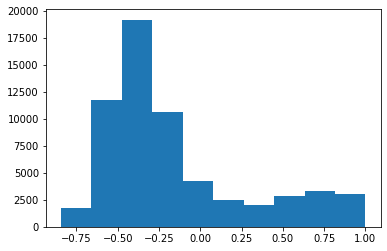

In [82]:
plt.hist(img_3d.flatten())
img_3d

# Verify that discriminator works with any size inputs

Conclusion is that the discriminator will always have output.shape = `[batch_size, 1]`, because of its design of the last average pooling layer. It basically averages all numbers from the output of the second last layer for each image in the batch.

In [145]:
%%timeit

import torch.nn as nn
import torch.nn.functional as F

class Discriminator(nn.Module):

  def __init__(self, input_nc, simple_d):
    """Constructor.

    Args:
      input_nc: int. Number of input channels.
      simpld_d: bool. Use simple discriminator or not.

    if simple_d:
      model := 3 * conv - avg_pool
    else:
      model := 5 * conv - avg_pool
    """
    super(Discriminator, self).__init__()

    # A bunch of convolutions one after another
    model = [
        nn.Conv2d(input_nc, 64, 4, stride=2, padding=1),
        nn.LeakyReLU(0.2, inplace=True)
    ]

    model += [
        nn.Conv2d(64, 128, 4, stride=2, padding=1),
        nn.InstanceNorm2d(128),
        nn.LeakyReLU(0.2, inplace=True)
    ]

    if not simple_d:
      model += [
          nn.Conv2d(128, 256, 4, stride=2, padding=1),
          nn.InstanceNorm2d(256),
          nn.LeakyReLU(0.2, inplace=True)
      ]

      model += [
          nn.Conv2d(256, 512, 4, padding=1),
          nn.InstanceNorm2d(512),
          nn.LeakyReLU(0.2, inplace=True)
      ]

    # FCN classification layer
    last_nc = 128 if simple_d else 512
    model += [nn.Conv2d(last_nc, 1, 4, padding=1)]

    self.model = nn.Sequential(*model)

  def forward(self, x):
    x = self.model(x)
    # Average pooling and flatten
    return F.avg_pool2d(x, x.size()[2:]).view(x.size()[0], -1)


opt = Option()
opt.input_nc = 3
opt.size = 64
opt.simple_d = False

# batch = torch.zeros(1, opt.input_nc, opt.size, opt.size)
batch = torch.randn(10, opt.input_nc, opt.size, opt.size)

netD = Discriminator(opt.input_nc, opt.simple_d)
pred = netD(batch)

pred

134 ms ± 3.69 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


# Benchmark generators

In [152]:
%%timeit

from models import Generator

opt = Option()
opt.input_nc = 3
opt.output_nc = 3
opt.size = 64
opt.n_res_blocks = 9

netG = Generator(opt.input_nc, opt.output_nc, n_residual_blocks=opt.n_res_blocks)
batch = torch.randn(10, opt.input_nc, opt.size, opt.size)
pred = netG(batch)
# print(pred)

1.48 s ± 65.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [163]:
f'{0:03d}'

'000'

# Tensorboard with images

In [171]:
import torch
import torchvision
from torch.utils.tensorboard import SummaryWriter
from torchvision import datasets, transforms

# # Writer will output to ./runs/ directory by default
# writer = SummaryWriter()

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = datasets.MNIST('mnist_train', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
model = torchvision.models.resnet50(False)
# Have ResNet model take in grayscale rather than RGB
model.conv1 = torch.nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)
images, labels = next(iter(trainloader))

grid = torchvision.utils.make_grid(images)
# writer.add_image('images', grid, 0)
# writer.add_graph(model, images)
# writer.close()

In [174]:
images.shape

torch.Size([64, 1, 28, 28])

In [176]:
grid.shape

torch.Size([3, 242, 242])

(array([124707.,   1749.,   1758.,   1353.,   1512.,  26781.,   1290.,
          1722.,   1914.,  12906.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ],
       dtype=float32),
 <a list of 10 Patch objects>)

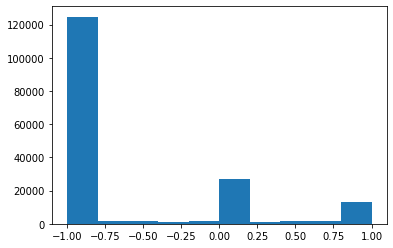

In [177]:
plt.hist(grid.flatten())

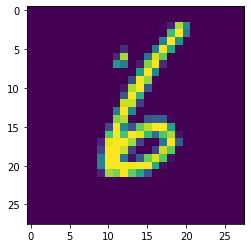

In [179]:
plt.imshow(images[0][0])

# Process MNIST images

In [222]:
import matplotlib
import os
import torchvision

def get_mnist_loader():
    transform32 = transforms.Compose([
        transforms.Resize(32, Image.BICUBIC),
        transforms.ToTensor(),
    ])
    trainset = datasets.MNIST('datasets/mnist_train', train=True, download=True, transform=transform32)
    data_loader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=False)
    return data_loader


def get_svhn_loader():
    trainset = datasets.SVHN('datasets/svhn_train', split='train', download=True, transform=transforms.ToTensor())
    data_loader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=False)
    return data_loader


def save_images(data_loader, side, train_count, test_count):
    dataset = 'train'  # one of train | test
    index = 0
    max_count = train_count + test_count
    for images, labels in data_loader:
        if images.size(1) == 1:
            images = images.squeeze(1)  # [batch, 1, 28, 28] -> [batch, 28, 28]
        else:
            assert images.size(1) == 3  # [batch, 3, 32, 32]
        
        for image in images:
            # matplotlib.image.imsave(f'datasets/mnist2svhn/{dataset}/{side}/{index:04d}.png', image.numpy())
            torchvision.utils.save_image(image, f'datasets/mnist2svhn/{dataset}/{side}/{index:04d}.png')
            index += 1
            
            if index >= train_count:
                dataset = 'test'

            if index >= max_count:
                break
        if index >= max_count:
            break


os.makedirs('datasets/mnist2svhn/train/A', exist_ok=True)
os.makedirs('datasets/mnist2svhn/test/A', exist_ok=True)
os.makedirs('datasets/mnist2svhn/train/B', exist_ok=True)
os.makedirs('datasets/mnist2svhn/test/B', exist_ok=True)
train_count = 1000
test_count = 1000
save_images(get_mnist_loader(), 'A', train_count, test_count)
save_images(get_svhn_loader(), 'B', train_count, test_count)

Using downloaded and verified file: datasets/svhn_train/train_32x32.mat


torch.Size([3, 32, 32])


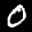

In [224]:
img_path = 'datasets/mnist2svhn/train/A/0001.png'
print(transforms.ToTensor()(Image.open(img_path)).shape)
Image.open(img_path)

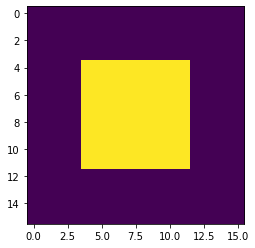

In [273]:
import random

size = 16
percent = random.choice([0.5, 0.8, 1.0])
mid = size // 2

lo = int(mid - mid * percent)
hi = int(mid + mid * percent)

mask = torch.zeros(size, size)
mask[lo:hi, lo:hi] = 1.0
plt.imshow(mask)

In [276]:
x = torch.zeros(1, 3, 32, 32)
mask = torch.zeros(1, 3, 32, 32)
torch.cat([x, mask], dim=1).shape

torch.Size([1, 6, 32, 32])

# Mask CycleGAN model evaluation

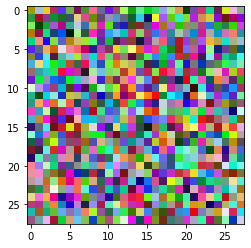

In [291]:
import numpy as np 
import matplotlib.pyplot as plt

run_id = 'mask7_mnist2svhn_h32_nres=3_simpled'

columns = 2
rows = 1

plt.imshow(np.random.uniform(size=(28, 28, 3)))

# imgs = [
#     np.random.uniform(size=(28, 28))
#     for _ in range(rows * columns)
# ]

# fig = plt.figure(figsize=(8, 8))
# for i in range(rows * columns):
#     fig.add_subplot(rows, columns, i + 1, )
#     plt.imshow(imgs[i])